<a href="https://colab.research.google.com/github/pankajr141/experiments/blob/master/Reasoning/ComputerVision/opencv%20tricks%20-%20segmenting%20pdf%20contents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip3 install pdf2jpg --quiet
!python -m pip install Pillow==7.0.0 --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pikepdf 7.0.0 requires Pillow>=9.0, but you have pillow 7.0.0 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 7.0.0 which is incompatible.


In [86]:
!ls *.pdf

OoPdfFormExample.pdf  uk_visa.pdf


In [88]:
from pdf2jpg import pdf2jpg
result = pdf2jpg.convert_pdf2jpg(inputpath="uk_visa.pdf", outputpath="uk_visa", dpi=300, pages="0")
print(result)

[{'cmd': ['java', '-jar', '/usr/local/lib/python3.8/dist-packages/pdf2jpg/pdf2jpg.jar', '-i', 'uk_visa.pdf', '-o', 'uk_visa', '-d', '300', '-p', '0'], 'input_path': 'uk_visa.pdf', 'output_pdfpath': 'uk_visa/uk_visa.pdf_dir', 'output_jpgfiles': ['uk_visa/uk_visa.pdf_dir/0_uk_visa.pdf.jpg']}]


In [89]:
from pdf2jpg import pdf2jpg
result = pdf2jpg.convert_pdf2jpg(inputpath="OoPdfFormExample.pdf", outputpath="OoPdfFormExample", dpi=300, pages="0")
print(result)

[{'cmd': ['java', '-jar', '/usr/local/lib/python3.8/dist-packages/pdf2jpg/pdf2jpg.jar', '-i', 'OoPdfFormExample.pdf', '-o', 'OoPdfFormExample', '-d', '300', '-p', '0'], 'input_path': 'OoPdfFormExample.pdf', 'output_pdfpath': 'OoPdfFormExample/OoPdfFormExample.pdf_dir', 'output_jpgfiles': ['OoPdfFormExample/OoPdfFormExample.pdf_dir/0_OoPdfFormExample.pdf.jpg']}]


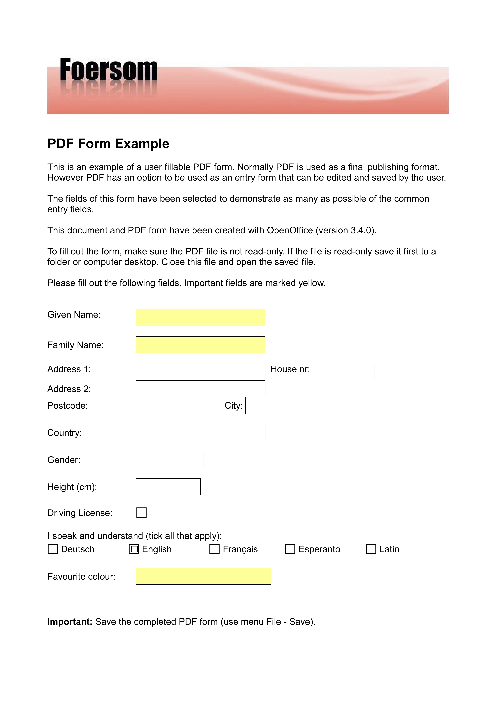

In [90]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def display(img):
  cv2_imshow(cv2.resize(img, None, fx=0.2, fy=0.2))

img = cv2.imread(result[0]['output_jpgfiles'][0])
display(img)

<pre>
1. Reversing scales of our RGB images for opencv operations to work
2. Removing pixels with low brigthness
</pre>

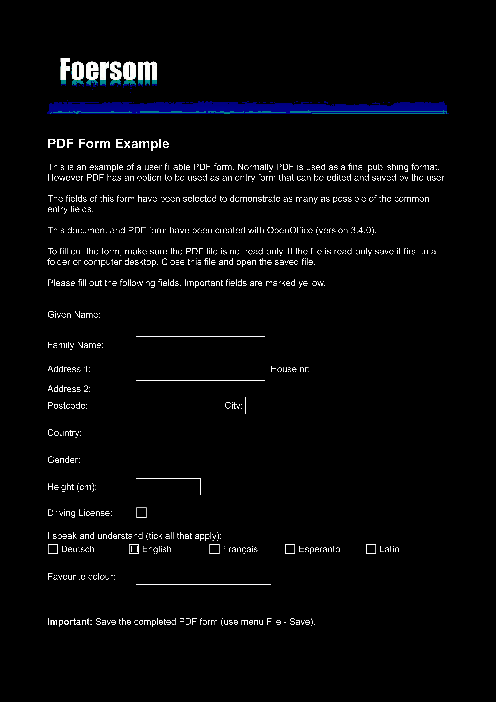

In [91]:
img_ = 255 - img      # Reversing scales of RGB image
img_[img_ < 128] = 0   # Removing pixel with low brightness
display(img_)

<pre>
1. Remove Lines from our image
2. grouping Elements which are near
</pre>

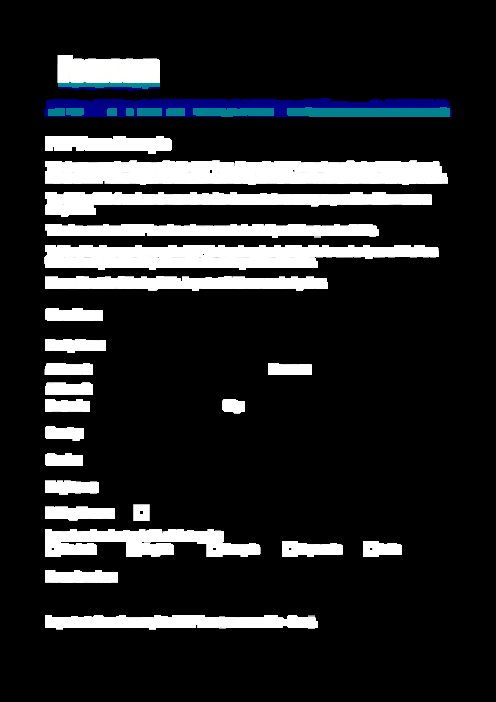

In [92]:
# Remove Lines from our image
kernel = np.ones((3, 3), np.uint8)
img_erosion = cv2.erode(img_, kernel, iterations=1)

# grouping Elements which are near
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=8)
display(img_dilation)

In [93]:
gray = cv2.cvtColor(img_dilation, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

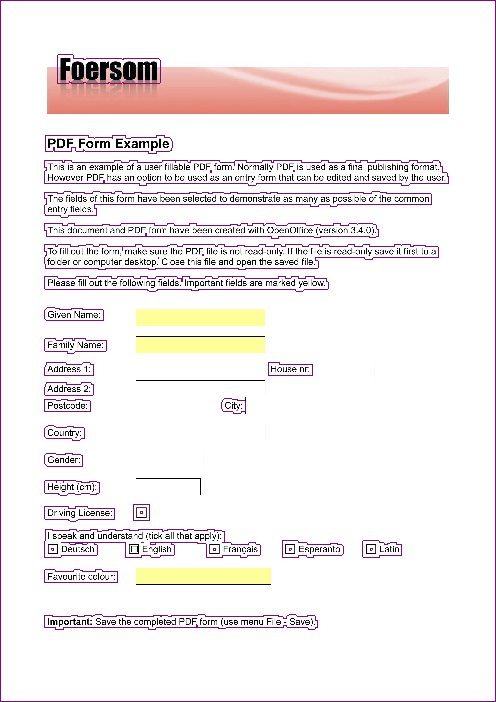

In [94]:
cv2.drawContours(img, contours, -1, (127, 12, 123), 3)
display(img)

In [95]:
(numLabels, labels_ids, stats, centroids) = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)

In [96]:
# Loop through each component
output = np.zeros(gray.shape, dtype="uint8")
for i in range(1, numLabels):
      
    # Labels stores all the IDs of the components on the each pixel
    # It has the same dimension as the threshold
    # So we'll check the component
    # then convert it to 255 value to mark it white
    componentMask = (labels_ids == i).astype("uint8") * 255

    # Creating the Final output mask
    output = cv2.bitwise_or(output, componentMask)